In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
import os

file_path = "../data/rbt_turnover_data.csv"

# Check if the file exists
if os.path.exists(file_path):
    print("✅ File found!")
    df = pd.read_csv(file_path)
    print(df.head())
else:
    print("❌ File not found! Check the file path.")

✅ File found!
  rbt_id  age education_level  years_experience  company_tenure  hourly_wage  \
0  RBT_1   26     High School               3.5             6.3           23   
1  RBT_2   39      Bachelor's               4.6             1.0           23   
2  RBT_3   48      Bachelor's               6.6             6.9           20   
3  RBT_4   34     High School               7.6             1.6           27   
4  RBT_5   30     High School               2.7             0.3           25   

   caseload_size  weekly_hours  travel_time_per_week  \
0              7            26                     1   
1              7            38                     1   
2             10            27                     9   
3             10            36                     0   
4              3            26                     8   

   supervision_hours_last_month  bcba_feedback_score  rbt_support_rating  \
0                             6                    5                   5   
1               

In [16]:
# Check for Missing Data:

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Show column data types
print("\nData Types:\n", df.dtypes)


Missing Values:
 rbt_id                                 0
age                                    0
education_level                        0
years_experience                       0
company_tenure                         0
hourly_wage                            0
caseload_size                          0
weekly_hours                           0
travel_time_per_week                   0
supervision_hours_last_month           0
bcba_feedback_score                    0
rbt_support_rating                     0
supervision_helpfulness_score          0
bcba_communication_score               0
bcba_goal_communication_score          0
supervision_frequency_last_3_months    0
burnout_score                          0
work_life_balance                      0
turnover_status                        0
dtype: int64

Data Types:
 rbt_id                                  object
age                                      int64
education_level                         object
years_experience                    

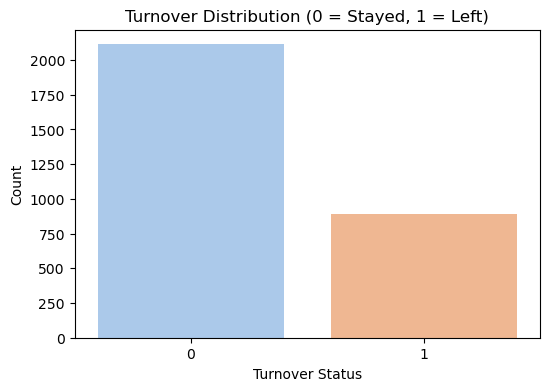

In [44]:
# ✅ 1️⃣ Turnover Distribution (How Many RBTs Stayed vs. Left?)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="turnover_status", data=df, hue="turnover_status", palette="pastel", legend=False)
plt.title("Turnover Distribution (0 = Stayed, 1 = Left)")
plt.xlabel("Turnover Status")
plt.ylabel("Count")
plt.show()

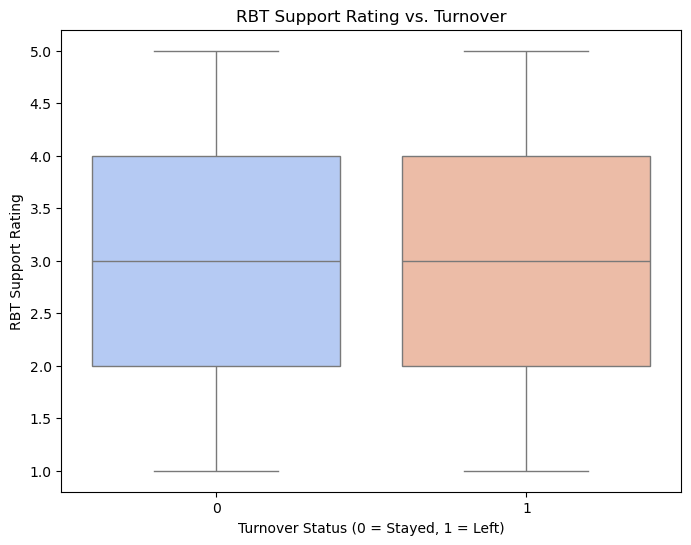

In [42]:
# ✅ 2️⃣ RBT Support Rating vs. Turnover

plt.figure(figsize=(8, 6))
sns.boxplot(x="turnover_status", y="rbt_support_rating", data=df, hue="turnover_status", palette="coolwarm", legend=False)
plt.title("RBT Support Rating vs. Turnover")
plt.xlabel("Turnover Status (0 = Stayed, 1 = Left)")
plt.ylabel("RBT Support Rating")
plt.show()

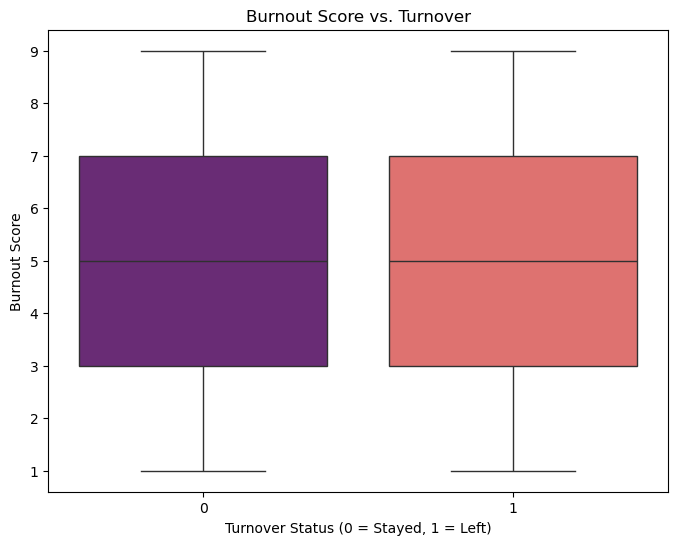

In [46]:
# ✅ 3️⃣ Burnout Score vs. Turnover

plt.figure(figsize=(8, 6))
sns.boxplot(x="turnover_status", y="burnout_score", data=df, hue="turnover_status", palette="magma", legend=False)
plt.title("Burnout Score vs. Turnover")
plt.xlabel("Turnover Status (0 = Stayed, 1 = Left)")
plt.ylabel("Burnout Score")
plt.show()

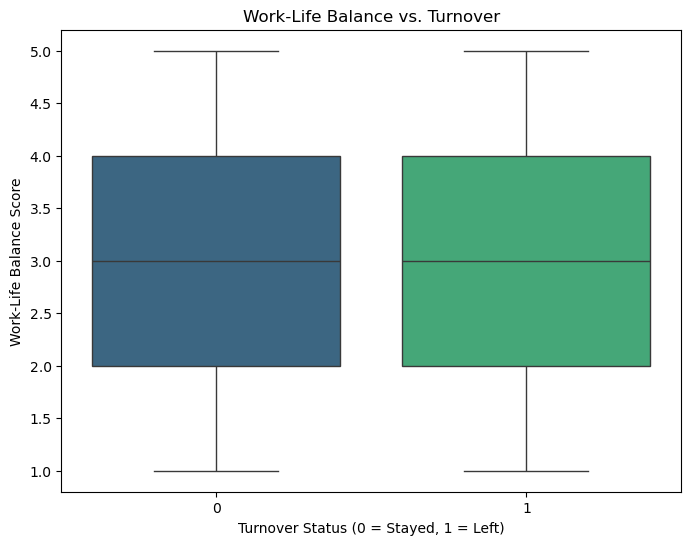

In [48]:
# ✅ 4️⃣ Work-Life Balance vs. Turnover

plt.figure(figsize=(8, 6))
sns.boxplot(x="turnover_status", y="work_life_balance", data=df, hue="turnover_status", palette="viridis", legend=False)
plt.title("Work-Life Balance vs. Turnover")
plt.xlabel("Turnover Status (0 = Stayed, 1 = Left)")
plt.ylabel("Work-Life Balance Score")
plt.show()

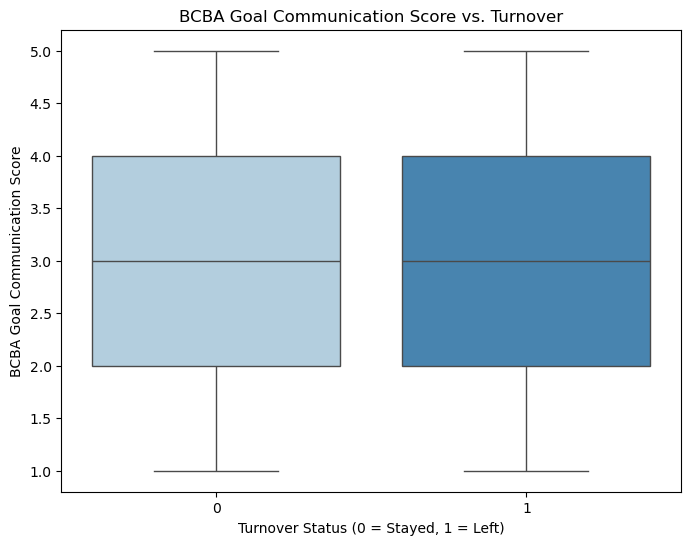

In [50]:
# ✅ 5️⃣ BCBA Goal Communication Score vs. Turnover

plt.figure(figsize=(8, 6))
sns.boxplot(x="turnover_status", y="bcba_goal_communication_score", data=df, hue="turnover_status", palette="Blues", legend=False)
plt.title("BCBA Goal Communication Score vs. Turnover")
plt.xlabel("Turnover Status (0 = Stayed, 1 = Left)")
plt.ylabel("BCBA Goal Communication Score")
plt.show()

In [56]:
# Check data types of all columns
print(df.dtypes)

rbt_id                                  object
age                                      int64
education_level                         object
years_experience                       float64
company_tenure                         float64
hourly_wage                              int64
caseload_size                            int64
weekly_hours                             int64
travel_time_per_week                     int64
supervision_hours_last_month             int64
bcba_feedback_score                      int64
rbt_support_rating                       int64
supervision_helpfulness_score            int64
bcba_communication_score                 int64
bcba_goal_communication_score            int64
supervision_frequency_last_3_months      int64
burnout_score                            int64
work_life_balance                        int64
turnover_status                          int64
dtype: object


In [58]:
education_mapping = {
    "High School": 1,
    "Associate's": 2,
    "Bachelor's": 3,
    "Master's": 4,
    "Doctorate": 5
}
df["education_level_encoded"] = df["education_level"].map(education_mapping)

In [60]:
df.drop(columns=["rbt_id", "education_level"], inplace=True)

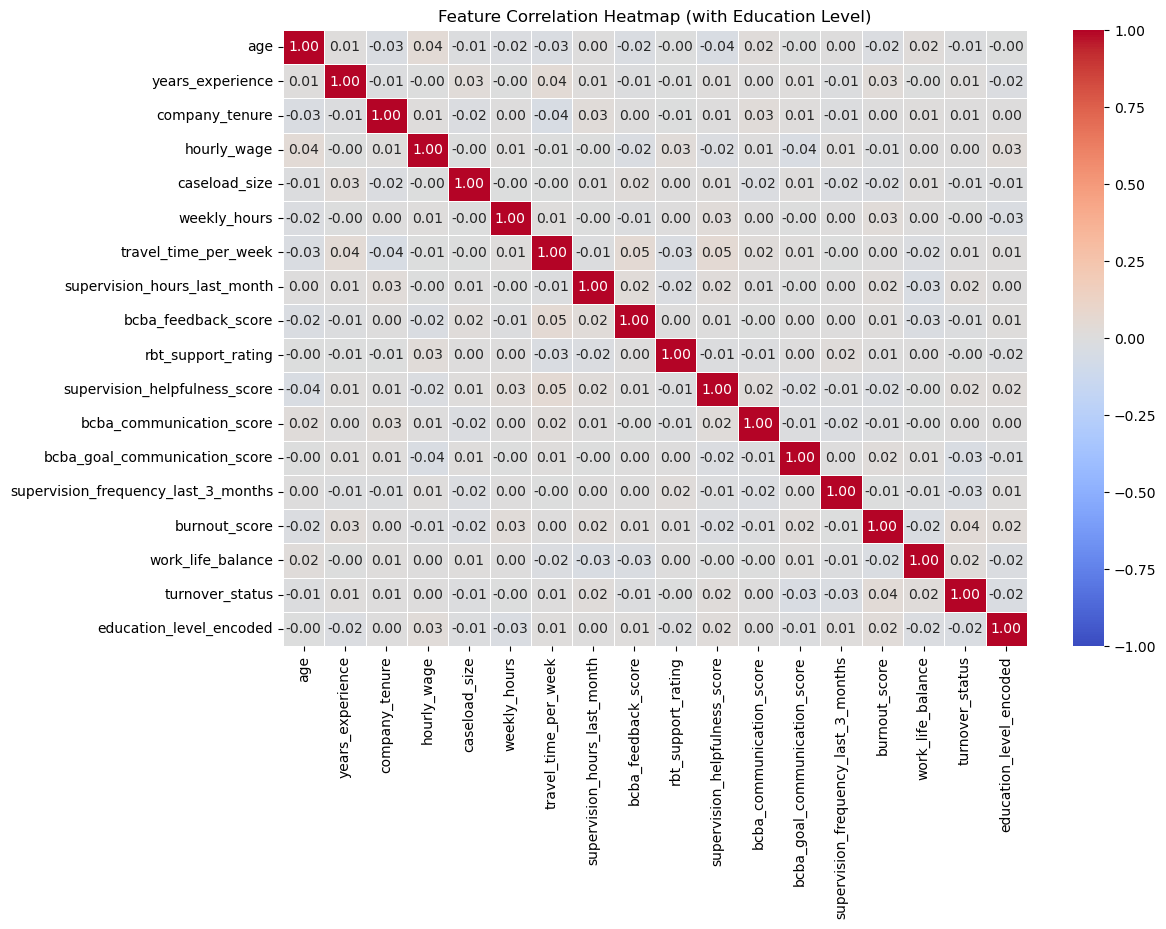

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix with updated data
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Title
plt.title("Feature Correlation Heatmap (with Education Level)")
plt.show()